<a href="https://colab.research.google.com/github/Tkag0001/AI_and_Machine_Learning_for_Coders/blob/main/Chapter6_Making_Sentiment_Programmable_Using_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 6: Making Sentiment Programmable Using Embeddings
### (Lập trình hóa hóa cảm xúc bằng cách sử dụng các vector biểu diễn).

P/s: Dịch thô là "Làm cho cảm xúc có thể lập trình được bằng cách sử dụng phần nhúng". Thường mọi người sẽ gọi là **Embedding** luôn, nó giống như một tên gọi đặc trưng hay thuật ngữ vậy. Mình nghĩ nếu mà dịch ra được thì gần nghĩa nhất là **vector biểu diễn**.

Nếu mọi người có cách dịch nào hay hơn có thể góp ý cho mình nha.

![Word Embedding Image](https://f.hypotheses.org/wp-content/blogs.dir/4190/files/2018/04/Screen-Shot-2018-04-25-at-13.21.44.png)

## Tổng quan nội dung chương này:

Chúng ta sẽ tìm hiểu về cách thức mà embedding hay các vector biểu diễn hoạt động. Tụi mình sẽ sử dụng bộ dữ liệu Sarcam đã tiếp xúc ở **chương 5** để xây dựng embeddings hay các vector biểu diễn giúp mô hình có thể phát hiện được sự mỉa mai trong các câu văn.

Tụi mình cũng sẽ tìm hiểu về một vài công cụ trực quan hóa dữ liệu để hiểu rõ hơn về các từ trong văn bản tương ứng với các vector và cách mà chúng xác định được phân loại tổng thể.

## Ôn tập và tìm hiểu

Trước khi bắt đầu **chương 6**, tụi mình cùng ôn tập lại tí **chương 5** nha.

Ở chương trước chúng ta đã được tìm hiểu thế nào là **mã hóa văn bản**, các cách cơ bản để mã hóa như **mã hóa kí tự** hay **mã hóa từ** thành một chuỗi hay dãy các số để máy có thể học tập và phân tích được.

Tuy nhiên, chúng ta phải thừa nhận một điều rằng, tất cả dữ liệu đều quy về **dạng số** và điều mà các mô hình học máy làm là thực hiện các **phép tính toán xác suất** lại với nhau. Chúng không có khả năng hiểu được **ngữ nghĩa của văn bản**.

Cách duy nhất để các số chứa đựng được **ngữ nghĩa của từ** là thông qua mã hóa. Tin buồn là:
>*Không có phương pháp mã hóa nào có thể bao hàm **tuyệt đối** ngữ nghĩa của một từ hay văn bản!.*

Tuy nhiên không hẳn là hết cách, tin vui là:
> *Không có phương pháp tuyệt đối nhưng chúng ta có những phương pháp **tương đối** để có thể nắm được nhiều hơn các ngữ nghĩa của chúng, và các phương pháp này không ngừng được phát triển và cải thiện.*

Hiện nay, hướng phát triển tốt nhất là **tăng cường dữ liệu đại diện cho các từ lên** thông qua việc **mã hóa các từ thành các vector biểu diễn (embeddings)**, các vector sẽ được biểu diễn trên một **chiều không gian cao hơn**. Nói vậy khá khó hiểu nên chúng ta sẽ đi vào ví dụ cụ thể nha.

Ở **chương 5** ta học về **mã hóa kí tự** hay **mã hóa từ** làm cho các câu văn, văn bản thành **vector một chiều** - **Không gian một chiều**.


```python
"Cảm ơn vũ trụ đã cho con sống lại một lần nữa để có thể làm những điều tuyệt vời này <3. ""
              |
              v
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
```
***Thần chú: tập hợp các phần tử tạo nên câu văn trong không gian một chiều có tọa độ là (x).***

Các phần tử có tọa độ lần lượt là:


```python
'Cảm': 1,
'ơn': 2,
'vũ': 3,
...
```


---

Giờ đây với phương pháp **word embedding**, các câu văn có thể được **mã hóa** lên một **chiều cao hơn** như một loạt các vector:

```python
"Cảm ơn vũ trụ đã cho con sống lại một lần nữa để có thể làm những điều tuyệt vời này <3."
              |
              v
[
 [0.1, 0.3, 0.5, 0.2, 0.9],  # Vector đại diện cho "Cảm"
 [0.4, 0.6, 0.7, 0.3, 0.8],  # Vector đại diện cho "ơn"
 [0.2, 0.8, 0.6, 0.4, 0.7],  # Vector đại diện cho "vũ"
 [0.5, 0.1, 0.3, 0.9, 0.6],  # Vector đại diện cho "trụ"
 ...
]

```

Vì lúc chuyển thành ma trận thì dẫn đến nhìn chiều ngang thành chiều dọc dễ gây ra nhầm lẫn nên mọi người để ý kĩ phần này nha.

Hiện tại câu văn của chúng ta đã được chuyển sang một **không gian 5 chiều.**
Câu văn vẫn là một chuỗi các phần tử liên tiếp nhau thôi. Nhưng giờ đây mỗi phần tử(từ) sẽ là một điểm dữ liệu ở **không gian 5 chiều**.

***Thần chú: tập hợp các phần tử tạo nên câu văn trong không gian 5 chiều có tọa độ là (x,y,z,p,q)***

Các phần tử có tọa độ lần lượt là:


```python
'Cảm': [0.1, 0.3, 0.5, 0.2, 0.9],
'ơn': [0.4, 0.6, 0.7, 0.3, 0.8],
'vũ': [0.2, 0.8, 0.6, 0.4, 0.7],
...
```

Mọi người có thể liên tưởng nó như toán cấp 3, hình học không gian 3 chiều ha, nào là khối lập phương với 4 đỉnh có tọa độ (x, y, z) đồ này...

Ở đây mình có thêm một ví dụ nữa khi thực hiện embeddings văn bản, các từ thành không gian 3 chiều nha.

![Embedding in 3D](https://www.baeldung.com/wp-content/uploads/sites/4/2023/03/word_embedding.drawio.png)

Các vector này sẽ không ngừng được học theo thời gian dựa trên việc sử dụng các từ trong ngữ cảnh, qua đó ta có thể nắm bắt được nhiều ngữ nghĩa hơn của từ cũng như các câu, văn bản.

Ngoài phương pháp **word embedding** ta vẫn sẽ còn nhiêu phương pháp **embedding** khác nữa với các cách thức và kết hợp cả phép toán cộng, trừ, nhân, chia đồ lại. Mọi người có thể thử tìm hiểu thêm về các phương pháp khác như **Sentece embeddding** nha.

***Lưu ý: Mình vẫn phải nhấn mạnh một lần nữa mọi thứ vẫn chỉ ở mức tương đối và không có gì là tuyệt đối cả (tính ở thời điểm hiện tại).***



# Establishing Meaning from Words (Thiết lập, tổ chức ngữ nghĩa từ các từ)

## A Simple Example: Positives and Negatives.

Thì trước khi đi vào cụ thể các **vector biểu diễn ở chiều không gian cao hơn**, tụi mình cùng đến với một vài ví dụ đơn giản để hiểu cách mà **ngữ nghĩa bắt nguồn từ các từ** nha.

Tụi mình sẽ lấy dữ liệu từ bộ dữ liệu **Sarcam** và giả định phương pháp **mã hóa** đơn giản như sau:
- Tất cả các từ đều có điểm số khởi tạo là 0.
- Với các từ xuất hiện trong các **tiêu đề mỉa mai** ta sẽ cộng 1 giá trị vào.
- Với các trường hợp còn lại ta sẽ trừ đi một giá trị.
- Qua đó với các từ cân bằng không có đóng góp nhiều trong ngữ nghĩa phân biệt các câu sẽ có giá trị là 0 **(giá trị tích cực và tiêu cực bằng nhau)**

Tiến hành phân tích cụ thể với 2 câu:

```python
"christian bale given neutered male statuette named oscar" - Câu mỉa mai

"gareth bale scores wonder goal against germany" - Không phải câu mỉa mai.
```

Tiến hành trích xuất ngữ nghĩa câu đầu tiên:
```python
{"christian": 1, "bale": 1, "given": 1, "neutered": 1, "male": 1, "statuette": 1, "named": 1, "oscar": 1}
```

Tiếp tục trích xuất ngữ nghĩa các từ với câu thứ hai:
```python
{"gareth": -1, "bale": -1, "scores": -1, "wonder": -1, "goal": -1, "against": -1, "germany": -1}
```

Tổng hợp lại danh sách ngữ nghĩa các từ:
```python
{ "christian" : 1, "bale" : 0, "given" : 1, "neutered": 1, "male" : 1,
 "statuette": 1, "named" : 1, "oscar": 1, "gareth" : -1, "scores": -1,
 "wonder" : -1, "goal" : -1, "against" : -1, "germany" : -1}
```

Ở đây mọi người thấy đấy:
```python
"bale": 0
```
Từ **"bale"** vì xuất hiện trong cả 2 trường hợp nên đã bù trừ, triệt tiêu nhau còn 0. Cứ lặp lại đi lặp lại quá trình này qua các câu, tiêu đề trong bộ dataset ta sẽ thu được một một danh sách khổng lồ từ vựng được đánh giá điểm số dựa trên cách sử dụng của chúng.

Bây giờ ta tiến hành dự đoán hay xác định xem câu dưới đây có phải mang ý mỉa mai không dựa trên từ điển hay **danh sách ngữ nghĩa** ở trên nha.

```python
"neutered male named against germany, wins statuette!": [1, 1, 1, -1, -1, 1]
```
Ở đây vì từ **"wins"** không có trong từ điển ngữ nghĩa nên tụi mình sẽ tiến hành lượt bỏ nha.

Sau khi mã hóa ra được dãy số trên đại diện cho list **điểm số tích cực/tiêu cực** của các từ, ta sẽ cộng hết lại. **Tổng điểm số** của câu đạt được là 2, là một **số dương**, qua đó xác định đây là một **câu mỉa mai**.

## Going a Little Deeper: Vectors
Tụi mình cùng đi sâu hơn với khái niệm vector nha.

Hi vọng là thông qua ví dụ trước đó mọi người có thể hiểu thêm về cách thiết lập, tổ chức ***ngữ nghĩa tương đối** cho các từ dựa trên mối liên hệ, liên kết của chúng theo cùng **một hướng**.

Nói khá khó hiểu nên là tụi mình phân tích lại nha. Ta có một đường thẳng hay vector đại diện cho không gian một chiều. Trên đó mỗi từ sau quá trình học sẽ có điểm số riêng, điểm số đó sẽ đại diện cho tọa độ trên vector.

Các từ ban đầu đều có tọa độ hay điểm số là 0. Khi kiểm tra thấy từ đó xuất hiện trong câu được đánh nhãn là **mỉa mai** thì sẽ **cộng 1 vào tọa độ và di chuyển về chiều dương**. Các từ xuất hiện trong các câu **không có ý mỉa mai** thì sẽ được **-1 vào tọa độ**. Cứ lặp lại như vậy cho đến khi hết bộ dữ liệu, ta sẽ có được một **tập ngữ nghĩa tương đối** của các từ.

Mình có vẽ một ví dụ minh họa sự tích cực và tiêu cực trong Tình yêu, mọi người có thể xem qua rồi tưởng tượng tương tự nha.


image.png

Ok, bây giờ tụi mình sẽ thử đến với một ví dụ nâng cao hơn hơn nha, khi mà chúng ta tăng số chiều lên để có thể nắm bắt được nhiều thông tin hơn. Ở đây tác giả lấy một ví dụ về việc xem xét, phân tích các nhân vật trong cuốn tiểu thuyết **"Kiêu hãnh và định kiến"** của nhà văn Jane Austen. Chúng ta sẽ xét **2 chiều x và y** lần lượt đại diện cho 2 yếu tố là **giới tính và sự quý tộc**. Độ dài của các vector sẽ đại diện cho **mức độ giàu có của mỗi nhân vật**.



image.png

Khi quan sát biểu đồ trên, mọi người có thể thấy ông **Darcy** là một người cực kì giàu có nhưng lại không cao quý bằng ông **William Luca** mặc dù ông ta ít giàu có hơn. Darcy được gọi là quý ông - "Mr" trong khi William Lucas thì lại được gọi là ngài - Sir.

Nhìn qua ông **Bennect**, rõ ràng rằng ông ta không phải là quý tộc và còn đang gặp khó khăn về tài chính khi mà mũi tên hướng xuống. Con gái ông ta là **Elizabeth Bennect** cũng tương tự vậy.

Quý cô **Lady Catherine** là người vượt trội nhất khi vừa rất giàu có và lại có địa vị quý tộc vô cùng cao. Trong truyện tiểu thuyết này, cuộc tình lãng mạn của **Elizabeth** và **Darcy** đã thể hiện nên những định kiến căng thẳng giữa **sự phân biệt giàu nghèo, tầng lớp giữa các quý tộc** với nhau.


Quay trở lại bài học của chúng ta, mỗi nhân vật trong ví dụ trên cũng tương tự giống như một từ vậy, thông qua việc **quan sát ở nhiều chiều** ta có thể khai thác được nhiều **khía cạnh, ý nghĩa tương đối** dựa trên các trục và **mối quan hệ giữa các vector** đại diện cho một từ với các vector khác.

# Embeddings in Tensorflow
Tụi mình sẽ tìm hiểu về vector biểu diễn (embeddings) với Tensorflow nha.

Nếu như ở các chương trước, tụi mình tìm hiểu về các lớp có khả năng học như **Dense** và **Conv2d** thì Tensorflow.keras cũng bổ sung cả cơ chế **embeddings** dưới dạng một lớp.

Lớp **Embedding** này sẽ tạo ra một bảng tra cứu ánh xạ từ một số nguyên đến một bẳng nhúng, nội dung của bảng này là các hệ số của vector biểu diễn đại diện cho các từ được xác định bởi các số nguyên. Do dó trong ví dụ trên về cuốn tiểu thuyết **"Kiêu hãnh và định kiến"** các tọa độ x và y cung cấp các vector biểu diẽn cụ thể cho các nhân vật trong sách.

Tất nhiên trong thực tế thì các vấn đề liên quan đến NLP cũng tương tự như vậy, tuy nhiên chúng ta sẽ sử dụng **số lượng chiều cao hơn** nữa, không chỉ đơn thuần là 2. **Hướng** của mỗi vector sẽ được coi là **mã hóa "ngữ nghĩa"** của mỗi từ, các từ có vector tương tự nhau, hướng gần giống nhau thì ta có thể nói là có mối liên hệ, liên quan với nhau.

P/s: tui viết xong mà tui cũng bắt đầu thấy lú lú rồi.

> **Vậy trọng số hay các vector biểu diễn trong lớp embeddings sẽ được biểu diễn như thế nào đây?**

Vâng, thật sự là chúng được **khởi tạo một cách ngẫu nhiên** đấy, không khác gì việc khởi tạo các ma trận bộ lọc của lớp tích chập. Sau đó trong quá trình học, huấn luyện thì trọng số các vector này sẽ không ngừng được cập nhật thông qua cơ chế **lan truyền ngược (backpropagation)**

Sau khi kết thúc quá trình huấn luyện thì các vector biểu diễn các từ sẽ **mã hóa sơ bộ các đặc trưng tương đồng giữa các từ**, qua đó ta có thể xác định được các từ có phần tương đồng với nhau thông qua hướng các vector của chúng.

Đọc xong đống lý thuyết này đầu mình cũng lùng bùng luôn nên cách tốt nhất là đi vào thực hiện đi, mặc dù cũng khó hiểu nhưng chắc sẽ dễ mường tượng hơn đống lý thuyết trên.

Tụi mình sẽ sử dụng bộ dữ liệu **Sarcam** đã tiếp xúc ở **chương 5** để thực hành nha.

## Building a Sarcam Detector Using Embeddings (Xây dựng mô hình phát hiện mỉa mai sử dụng các vector biểu diễn - cơ chế embedding)

Mình vừa mò được cái này khá hay, dùng thẳng API Kaggle để load dữ liệu vào bộ đệm thay vì phải upload lên.

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rmisra/news-headlines-dataset-for-sarcasm-detection")

print("Path to dataset files:", path)

100%|██████████| 3.30M/3.30M [00:00<00:00, 48.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection/versions/2


Tụi mình sẽ tiến hành kiểm tra thư mục và load dữ liệu từ các thư mục nha.

In [3]:
import os
print("Các thư mục dữ liệu hiện có:")
for f in os.listdir("/root/.cache/kagglehub/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection/versions/2"):
  print(f)

Các thư mục dữ liệu hiện có:
Sarcasm_Headlines_Dataset.json
Sarcasm_Headlines_Dataset_v2.json


In [4]:
# Ở đây tụi mình sẽ load bộ dữ liệu thứ 2
# Mình đề xuất xử dụng pandas để load và quan sát cho dễ nha.
import pandas as pd

sarcasm_headlines_dataset = pd.read_json("/root/.cache/kagglehub/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection/versions/2/Sarcasm_Headlines_Dataset_v2.json", lines=True)

# Xem 5 dòng đầu tiên
sarcasm_headlines_dataset.head()

is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep. totally nails why congress is falling...   
2             0  eat your veggies: 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word 'strea...   

                                        article_link  
0  https://www.theonion.com/thirtysomething-scien...  
1  https://www.huffingtonpost.com/entry/donna-edw...  
2  https://www.huffingtonpost.com/entry/eat-your-...  
3  https://local.theonion.com/inclement-weather-p...  
4  https://www.theonion.com/mother-comes-pretty-c...

In [5]:
# Lấy danh sách headlines và labels
headlines = sarcasm_headlines_dataset["headline"].tolist()
labels = sarcasm_headlines_dataset["is_sarcastic"].tolist()

Tụi mình sẽ tiến hành xử lý nhanh phần loại bỏ từ dùng, làm sạch và đệm cho bộ dữ liệu nha. Các bạn có thể coi lại ở **chương 5** để ôn tập.

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.corpus import stopwords
import bs4 as BeautifulSoup
import re
import string
import numpy as np

In [7]:
# Lấy danh sách từ dừng
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
# Tạo table để xóa kí tự đặc biệt
table = str.maketrans('', '', string.punctuation)

In [9]:
# Tiến hành làm sạch văn bản
headlines_preprocessed = []
for h in headlines:
  sentence = h.lower()
  # Tiến hành xử lý các kí tự đặc biệt, phòng trường hợp người dùng viết liền chúng với các từ.
  sentence = sentence.replace(",", " , ")
  sentence = sentence.replace(".", " . ")
  sentence = sentence.replace("/", " / ")
  sentence = sentence.replace("?", " ? ")
  sentence = sentence.replace("!", " ! ")
  sentence = sentence.replace("-", " - ")
  sentence = sentence.replace("(", " ( ")
  sentence = sentence.replace(")", " ) ")
  sentence = sentence.replace("$", " $ ")
  sentence = sentence.replace("%", " % ")
  sentence = sentence.replace("&", " & ")

  # Loại bỏ các thẻ HTML bằng BeautifulSoup
  soup = BeautifulSoup.BeautifulSoup(sentence)
  sentence = soup.get_text()

  # Loại bỏ các kí tự đặc biệt
  sentence = sentence.translate(table)

  # Chuẩn hóa lại các kí tự khoảng trắng dư thừa liên tiếp thành 1 khoảng trắng
  sentence = re.sub('\s+', ' ', sentence)

  # Tiến hành lọc và loại bỏ từ dừng
  words = sentence.split()
  filtered_sentence = []

  for w in words:
    if w not in stop_words:
      filtered_sentence.append(w)

  filtered_sentence = " ".join(filtered_sentence)
  # Thêm vào danh sách headline đã tiền xử lý
  headlines_preprocessed.append(filtered_sentence)

<ipython-input-9-f98086efb789>:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup.BeautifulSoup(sentence)


In [10]:
# Tiến hành kiểm tra thử 5 câu đầu cho chắc
for i in range(5):
  print("Câu gốc: ", headlines[i])
  print("Câu đã được tiền xử lý: ", headlines_preprocessed[i])
  print("-"*100)

Câu gốc:  thirtysomething scientists unveil doomsday clock of hair loss
Câu đã được tiền xử lý:  thirtysomething scientists unveil doomsday clock hair loss
----------------------------------------------------------------------------------------------------
Câu gốc:  dem rep. totally nails why congress is falling short on gender, racial equality
Câu đã được tiền xử lý:  dem rep totally nails congress falling short gender racial equality
----------------------------------------------------------------------------------------------------
Câu gốc:  eat your veggies: 9 deliciously different recipes
Câu đã được tiền xử lý:  eat veggies 9 deliciously different recipes
----------------------------------------------------------------------------------------------------
Câu gốc:  inclement weather prevents liar from getting to work
Câu đã được tiền xử lý:  inclement weather prevents liar getting work
------------------------------------------------------------------------------------------------

Tiến hành chia bộ dữ liệu huấn luyện và kiểm tra, ở đây mình dùng train_test_split của sklearn cho nhanh nha

In [11]:
from sklearn.model_selection import train_test_split

train_sequences, test_sequences, train_labels, test_labels = train_test_split(headlines_preprocessed, labels, test_size=0.2, random_state = 42)

Tiến hành tạo bộ mã hóa, mã hóa và thêm bộ đệm vào nha

In [12]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_sequences)
word_index = tokenizer.word_index
print("Xem tập từ điển: ", word_index)

Xem tập từ điển:  {'<OOV>': 1, 'new': 2, 'trump': 3, 'man': 4, 'report': 5, 'one': 6, 'year': 7, 'u': 8, 'area': 9, 'day': 10, 'says': 11, 'woman': 12, 'time': 13, 'like': 14, 'first': 15, 'donald': 16, 'get': 17, 'old': 18, 'trumps': 19, 'people': 20, 'life': 21, 'house': 22, 'obama': 23, 'white': 24, 'still': 25, 'back': 26, 'make': 27, 'women': 28, 'clinton': 29, 'could': 30, 'world': 31, '5': 32, 'way': 33, 'years': 34, 'family': 35, 'would': 36, 'black': 37, 'americans': 38, 'gop': 39, 'study': 40, 'american': 41, 'school': 42, '3': 43, 'bill': 44, 'cant': 45, 'show': 46, 'really': 47, 'finds': 48, 'best': 49, 'police': 50, 'nation': 51, 'watch': 52, '10': 53, 'know': 54, 'big': 55, 'going': 56, 'death': 57, 'good': 58, 'state': 59, 'president': 60, 'video': 61, 'home': 62, 'last': 63, 'things': 64, '2': 65, 'every': 66, 'say': 67, 'right': 68, 'kids': 69, 'campaign': 70, 'love': 71, 'parents': 72, 'mom': 73, 'hillary': 74, 'health': 75, 'work': 76, 'self': 77, '000': 78, 'getting

In [13]:
# Mã hóa cho tập train và tập test
train_sequences_encoded = tokenizer.texts_to_sequences(train_sequences)
test_sequences_encoded = tokenizer.texts_to_sequences(test_sequences)

In [14]:
# Kiểm tra đảm bảo việc mã hóa đã được thực hiện
print("Câu đã qua xử lý: ", train_sequences[0])
print("Câu đã được mã hóa: ", train_sequences_encoded[0])

Câu đã qua xử lý:  trump really feels queer people explained one sentence
Câu đã được mã hóa:  [3, 47, 524, 594, 20, 4678, 6, 1861]


Vì ở đây mình không thấy tác giả nói rõ là bao nhiêu, nếu như giống ở chương 5 là 10 thì mình thấy ngắn quá nên là chúng ta sẽ tiến hành đệm cho chuỗi dựa trên độ dài tối đa mà 95% độ dài dữ liệu train đều nằm trong khoảng đó nha.

In [15]:
# kiểm tra độ dài của câu dài nhất
list_len = [len(s) for s in train_sequences]
max_len = max(list_len)
mean_len = np.mean(list_len)
# Tính độ dài tối đa sao cho 95% các chuỗi có độ dài nhỏ hơn hoặc bằng giá trị này
max_len_95 = int(np.percentile(list_len, 95))
print("Độ dài tối đa with 95%: ", max_len_95)
print("Độ dài câu dài nhất: ", max_len)
print("Độ dài câu trung bình: ", mean_len)

Độ dài tối đa with 95%:  80
Độ dài câu dài nhất:  235
Độ dài câu trung bình:  50.65603843633981


In [16]:
padding_type = "post"
trunc_type = "post"

# Tiến hành đệm cho bộ dữ liệu
train_padded = pad_sequences(train_sequences_encoded,
                             maxlen = max_len_95,
                             padding = padding_type,
                             truncating = trunc_type)

test_padded = pad_sequences(test_sequences_encoded,
                            maxlen = max_len_95,
                            padding = padding_type,
                            truncating = trunc_type)

In [17]:
# Chuyển tất cả sang dạng numpy array
train_padded = np.array(train_padded)
train_labels = np.array(train_labels)
test_padded = np.array(test_padded)
test_labels = np.array(test_labels)

### Xây dựng mô hình với lớp embedding
Bây giờ tụi mình sẽ đến với phần quan trọng là xây dựng mô hình bao gồm cả lớp embedding nha, tạm thười tụi mình chỉ định nghĩa một kiến trúc đơn giản cho mô hình trước thôi với đầu ra sẽ là kết quả nhị phân.

Về phần **lớp embedding** tạm thời tụi mình sẽ định nghĩa đơn giản trước với kích thước **vocab_size** tương đương với kích thước trong tokenizer. Phần embedding_dim tức số chiều của dữ liệu, ở đây mình sẽ định nghĩa là 16 tức mỗi từ trong từ điển sẽ có một **vector biểu diễn 16 chiều**.

Mọi người có thể tìm hiểu thêm về lớp **Global average pooling** nha. Nôm na là nếu như **Average pooling** thông thường đưa ra dưới dạng vector các giá trị của cửa sổ trượt đi qua trong mỗi kênh, thì **Global average pooling** lại tính trung bình cộng tất cả cả giá trị trong kênh đó luôn nên đầu ra của kênh đó chỉ là một số thay vì vector giống cái trước.

In [18]:
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential

model = Sequential([
    Embedding(10000, 16, input_shape=(None,)),
  	GlobalAveragePooling1D(),
  	Dense(24, activation="relu"),
  	Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
# Quan sát lại kiến trúc mô hình
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, None, 16)            │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 16)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 24)                  │             408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              25 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,433 (626.69 KB)

 Trainable params: 160,433 (626.69 KB)

 Non-trainable params: 0 (0.00 B)

Như mọi người có thể thấy, kích thước đầu ra của lớp **Embedding** là tensor 3 chiều nhưng sau khi qua lớp **Global average pooling** thì vì các giá trị được tổng hợp lại thành 1 giá trị trung bình cộng nên đã giảm đi 1 chiều.

Bây giờ chúng ta sẽ tiến hành huấn luyện mô hình nha. Sử dụng luôn tập test làm validation đô lường

In [20]:
import time
# Tính thời gian huấn luyện
start_time = time.time()
history = model.fit(train_padded, train_labels, epochs=30, validation_data=(test_padded, test_labels))
end_time = time.time()
# Lấy danh sách thông số từ lịch sử huấn luyện ra
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss_acc = history.history["loss"]
val_loss = history.history["val_loss"]

Epoch 1/30
716/716 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5224 - loss: 0.6916 - val_accuracy: 0.5432 - val_loss: 0.6830
Epoch 2/30
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6088 - loss: 0.6637 - val_accuracy: 0.6167 - val_loss: 0.6232
Epoch 3/30
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7548 - loss: 0.5110 - val_accuracy: 0.7862 - val_loss: 0.4567
Epoch 4/30
716/716 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8159 - loss: 0.4107 - val_accuracy: 0.7580 - val_loss: 0.4880
Epoch 5/30
716/716 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8409 - loss: 0.3629 - val_accuracy: 0.8010 - val_loss: 0.4193
Epoch 6/30
716/716 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8564 - loss: 0.3232 - val_accuracy: 0.8063 - val_loss: 0.4159
Epoch 7/30
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8638 - loss: 0.3143 - val_accuracy: 0.8064 - val_loss: 0.4197
Epoch 8/30
716/716 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8790 - loss: 0.2892 - val_accuracy: 0.

In [21]:
from datetime import timedelta
training_time = end_time - start_time
formatted_time = str(timedelta(seconds=training_time))
print(f"Thời gian huấn luyện: {formatted_time}")

Thời gian huấn luyện: 0:00:56.423404


In [22]:
# Vẽ lại biểu đồ quá trình huấn luyện
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs = axs.flatten()
axs[0].plot(train_acc, label="Training accuracy")
axs[0].plot(val_acc, label="Validation accuracy")
axs[0].legend()
axs[0].set_title("Training and validation accuracy")

axs[1].plot(loss_acc, label="Training loss")
axs[1].plot(val_loss, label="Validation loss")
axs[1].legend()
axs[1].set_title("Training and validation loss")

plt.tight_layout()
plt.show()

Đây là kết quả ở lần chạy của mình:

image.png

In [23]:
# Kết quả đánh giá mô hình
eval = model.evaluate(test_padded, test_labels)
print("Loss:", eval[0])
print("Accuracy:", eval[1])

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8026 - loss: 0.6039
Loss: 0.6256422400474548
Accuracy: 0.7961215972900391


Uầy cái đường đo loss của val trắc trở như đường tình của mình vậy :v   
Có vẻ như là mô hình đã không hoạt động hiệu quả trên tập dữ liệu val của chúng ta rồi, rơi vào trường hợp **quá khớp (Overfiting)**. Accuracy trên tập **train** rõ ràng rất cao nhưng trên tập **val** lại cách biệt rõ hơn. Khi qua kiểm tra bên biểu đồ **Loss** thì điều này càng được biểu diễn rõ rệt hơn khi mà lỗi trên tập **val** cách biệt hoàn toàn và tăng lên một cách rõ rệt so với tập **train**

Nhưng nghĩ lại thì cũng hợp lý mà, tập dữ liệu xác thực hay hiệu chỉnh(val) có thể chứa những từ không nằm trong danh sách từ mã hóa hay nói cách khác là các token **< OOV >**. Do đó dẫn đến việc với các dữ liệu mới quá nhiều mô hình hoạt động không còn hiệu quả nữa.

Mọi người đừng quá bất ngờ nha, thực ra thì tình trạng **quá khớp (Overfiting)** trong các **mô hình NLP** diễn ra là điều hết sức bình thường bởi do **bản chất không thể nào đoán trước được ngôn ngữ**. Số lượng từ vựng trong mỗi ngôn ngữ là vô cùng lớn chưa kể việc có rất nhiều ngôn ngữ nên để mà có đầy đủ hết được số lượng từ là điều không thể, nó là một con số khổng lồ và không thể xác định được.

Trong các phần tiếp theo, tụi mình sẽ đi tìm cách giải quyết, làm giảm sự tác động của tình trạng trên thông qua một vài kĩ thuật nha.


# Reducing Overfiting in Language Models (Làm giảm tình trạng quá khớp trong các mô hình ngôn ngữ)

Tình trạng **quá khớp (Overfiting)** xảy ra khi một mô hình trở nên quá chú trọng trên tập dữ liệu huấn luyện, một trong số những nguyên nhân đến từ việc chúng tương thích quá tốt với các **mẫu dữ liệu nhiễu** trong **tập huấn luyện (train)**. Tuy nhiên các **dữ liệu nhiễu** đó lại không xuất hiện trong **tập hiệu chỉnh (val)** khiến cho mô hình trở nên tệ trong việc kiểm tra.

Do đó, chúng ta sẽ tiến hành tìm hiểu một vài thủ thuật để **khái quát hóa mô hình** cũng như làm **giảm đi tính quá khớp** với các mô hình ngôn ngữ.

# Adjusting the learning rate (Điều chỉnh tốc độ học)

Một trong số những nguyên nhân lớn dẫn đến tình trạng quá khớp mà mọi người gặp phải chính là vấn đề về **tốc độ học (learning rate)**. Khi tham số này trở nên quá cao đồng nghĩa với việc mô hình học quá nhanh, dẫn đến việc học quá mức ở một số đặc trưng nhưng lại đi nhanh và có thể bở lỡ ở một số đặc trưng khác.

Tụi mình thường dùng một hàm cơ bản để định nghĩa các phần tham số và phương pháp học cho mô hình như này đúng không:


```python
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
```
Thì phương thức trên gọi sẵn hàm **adam** với các tham số mặc định, giờ đây tụi mình sẽ tiến hành tinh chỉnh **tham số tốc độ học (learning rate)** cụ thể hơn.

```python
adam = tf.keras.optimizer.Adam(learning_rate=0.0001,
                                beta_1=0.9, beta_2=0.999,
                                amsgrad=False)

```

Tham số **learning rate** mặc định là **0.001**, tụi mình đổi nó thành **0.0001**. Còn lại các tham số khác mình vẫn để mặc định. Mọi người có thể tự tìm hiểu thêm nha. Ở đây mình chỉ nói ngắn gọn **beta1 và beta2** liên quan đến hệ số giảm dần của cá giá trị, **amsgrad** là để chỉ định có sử dụng một dạng biến thể tối hưu hóa của thuật toán **adam** không.



Bây giờ mình sẽ tiến hành định nghĩa lại mô hình và huấn luyện nó với **100 epochs** nha.

In [24]:
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model_1 = Sequential([
    Embedding(10000, 16, input_shape=(None,)),
  	GlobalAveragePooling1D(),
  	Dense(24, activation="relu"),
  	Dense(1, activation="sigmoid")
])

adam = Adam(learning_rate=0.0001,
            beta_1=0.9, beta_2=0.999,
            amsgrad=False)

model_1.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])

In [25]:
import time
# Tính thời gian huấn luyện
start_time = time.time()
history1 = model_1.fit(train_padded, train_labels, epochs=100, validation_data=(test_padded, test_labels))
end_time = time.time()
# Lấy danh sách thông số từ lịch sử huấn luyện ra
train_acc = history1.history["accuracy"]
val_acc = history1.history["val_accuracy"]
loss_acc = history1.history["loss"]
val_loss = history1.history["val_loss"]

Epoch 1/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5208 - loss: 0.6921 - val_accuracy: 0.5234 - val_loss: 0.6914
Epoch 2/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5259 - loss: 0.6911 - val_accuracy: 0.5234 - val_loss: 0.6907
Epoch 3/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5262 - loss: 0.6903 - val_accuracy: 0.5234 - val_loss: 0.6899
Epoch 4/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5294 - loss: 0.6888 - val_accuracy: 0.5234 - val_loss: 0.6879
Epoch 5/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5252 - loss: 0.6870 - val_accuracy: 0.5238 - val_loss: 0.6848
Epoch 6/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5354 - loss: 0.6834 - val_accuracy: 0.5477 - val_loss: 0.6795
Epoch 7/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5587 - loss: 0.6770 - val_accuracy: 0.5872 - val_loss: 0.6713
Epoch 8/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6219 - loss: 0.6671 - val_accu

In [26]:
from datetime import timedelta
training_time = end_time - start_time
formatted_time = str(timedelta(seconds=training_time))
print(f"Thời gian huấn luyện: {formatted_time}")

Thời gian huấn luyện: 0:03:22.893688


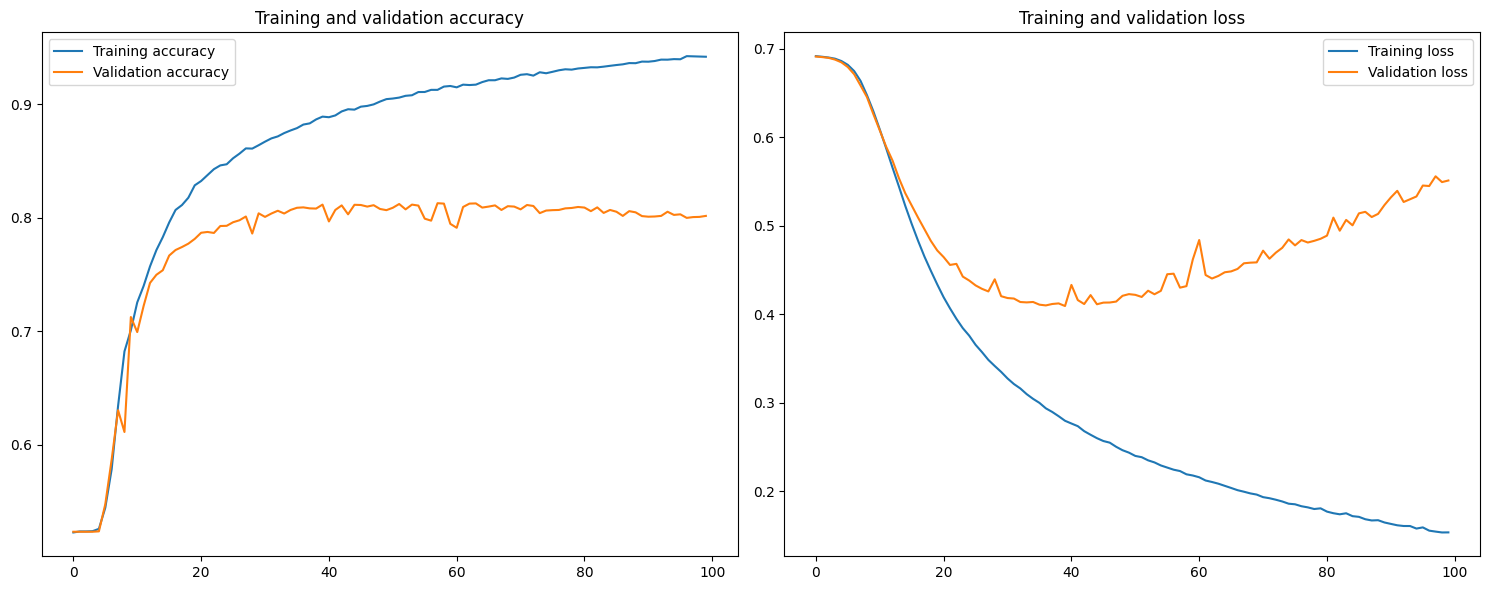

In [27]:
# Vẽ lại biểu đồ quá trình huấn luyện
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs = axs.flatten()
axs[0].plot(train_acc, label="Training accuracy")
axs[0].plot(val_acc, label="Validation accuracy")
axs[0].legend()
axs[0].set_title("Training and validation accuracy")

axs[1].plot(loss_acc, label="Training loss")
axs[1].plot(val_loss, label="Validation loss")
axs[1].legend()
axs[1].set_title("Training and validation loss")

plt.tight_layout()
plt.show()

Đây là kết quả ở lần chạy của mình.

image.png

In [28]:
# Kết quả đánh giá mô hình
eval1 = model_1.evaluate(test_padded, test_labels)
print("Loss: ", eval1[0])
print("Accuracy: ", eval1[1])

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8082 - loss: 0.5250
Loss:  0.5512498617172241
Accuracy:  0.8017120957374573


Mọi người có thể rằng việc giảm tốc độ học đi nhiều có tác động sâu sắc tới mô hình. Cụ thể hơn là **loss** đã giảm đi hơn nhiều so với mô hình trước đó ngay cả khi ta so ở mức epoch thứ 30.

Dựa trên biểu đồ **độ chính xác (accuracy)**, ở các epoch đầu tiên, mọi người có thể thấy mạng không học, chúng chỉ loanh quoanh mức 0.5 trước khi có sự bùng nổ và đột phá và độ chính xác, học một cách nhanh chóng.

Khi ta chuyển sang khám phá biểu đồ **độ lỗi (loss)**, chúng ta có thể thấy ngay cả khi độ chính xác không tăng ở các epoch đầu thì **loss vẫn có sự giảm đi**. Do đó bạn có thể tin rằng mô hình hay mạng lưới sẽ bắt đầu học sau một khoảng thời gian nếu chúng ta quan sát qua từng epoch.

Quan sát kĩ hơn biểu đồ **độ lỗi (loss)** ở mô hình hiện tại so với trước đó mọi người có thể thấy, thời điểm mà **loss** bắt đầu cho ta thấy dấu hiệu bị **quá khớp** của mô hình đã trở nên **lâu hơn rất nhiều** (ở mô hình cũ là tầm epoch 5 nhưng mô hình mới này lại là tầm epoch 60).

Ngoài ra khi so ngang ở epoch 30 độ lỗi cũng thấp hơn hẳn với chỉ hơn 0.4 tí, trong khi đó mô hình cũ lại là gần gấp đôi.

# Tổng kết phương pháp điều chỉnh tốc độ học (learning_rate)
Tổng kết lại với việc thay đổi siêu tham số như trên, **độ lỗi** trên tập hiệu chỉnh (val) bắt đầu tăng ở epoch 60, lúc này **độ chính xác** đạt được trên tập train là **90%** và trên val là **81%**. **Loss cuối cùng** đo được trên tập val cũng chỉ **dưới 0.5**. Qua đó ta có thể khẳng định rằng chúng ta đã có được một mô hình **khá hiệu quả** sau khi thay đổi.


Tất nhiên việc điều chỉnh tốc độ học này chỉ là một cách đơn giản để tối ưu hoá mô hình, tuy nhiên vẫn còn một vài cách khác nữa mà chúng ta sẽ thực hiện tiếp theo để cải thiện mô hình.

Trong một vài ví dụ tiếp theo trong việc cải thiện mô hình mình vẫn sẽ sử dụng hàm **Adam cơ bản**.
> **Tại sao lại vậy?**

Đơn giản là vì mình không muốn việc dùng phương pháp **điều chỉnh tốc độ học (learning rate)** sẽ làm lu mờ hay khó nhận ra hiệu quả của các phương pháp khác.

# Exloring vocabulary size. (Khám phá kích thước từ điển, số lượng tưf vựng ra)

Về cơ bản thì tất cả dữ liệu đều là từ vựng nên là tụi mình sẽ đi khám phá xem thử các từ trong bộ dữ liệu cũng như **tần suất** của chúng, biết đâu rằng có thể tìm ra được **manh mối** nào hữu ích cho việc làm giảm đi sự **quá khớp** của mô hình.


Mọi nngười có thể sử dụng hàm **word_counts** có sẵn của **tokenizer** để xem tần suất xuất hiện của các từ nha.

In [29]:
wc = tokenizer.word_counts
print(wc)

OrderedDict([('trump', 1129), ('really', 203), ('feels', 52), ('queer', 47), ('people', 323), ('explained', 6), ('one', 466), ('sentence', 18), ('egyptian', 8), ('death', 188), ('soccer', 23), ('fans', 91), ('puts', 43), ('presidents', 28), ('iron', 9), ('grip', 3), ('test', 42), ('stripper', 5), ('failing', 20), ('school', 212), ('shes', 61), ('working', 63), ('self', 164), ('texas', 65), ('attorney', 18), ('general', 36), ('ken', 11), ('paxton', 3), ('indicted', 10), ('congresswoman', 5), ('fights', 10), ('gun', 121), ('control', 79), ('almost', 38), ('lost', 61), ('life', 323), ('violence', 78), ('lana', 3), ('del', 7), ('rey', 2), ('stevie', 4), ('nicks', 4), ('cast', 26), ('joint', 8), ('musical', 17), ('spell', 4), ('upcoming', 29), ('album', 37), ('food', 111), ('insecurity', 1), ('inactivity', 1), ('driving', 37), ('obesity', 8), ('epidemic', 18), ('heres', 134), ('reminder', 19), ('far', 48), ('donald', 368), ('flip', 16), ('flopped', 1), ('health', 165), ('care', 109), ('disg

Mọi người có thể thấy rằng thứ tự xuất hiện của các từ này dựa trên thứ tự xuất hiện trong bộ dữ liệu chứ không phải theo số lần xuất hiện. Bây giờ tụi mình sẽ sắp xếp lại giảm dần theo tần suất nha.

In [30]:
from collections import OrderedDict
wc_sorted = OrderedDict(sorted(wc.items(), key=lambda x: x[1], reverse=True))
print(wc_sorted)

OrderedDict([('new', 1368), ('trump', 1129), ('man', 1110), ('report', 482), ('one', 466), ('year', 445), ('u', 422), ('area', 410), ('day', 407), ('says', 405), ('woman', 404), ('time', 393), ('like', 387), ('first', 380), ('donald', 368), ('get', 359), ('old', 337), ('trumps', 331), ('people', 323), ('life', 323), ('house', 310), ('obama', 308), ('white', 305), ('still', 291), ('back', 290), ('make', 284), ('women', 263), ('clinton', 252), ('could', 251), ('world', 251), ('5', 249), ('way', 248), ('years', 237), ('family', 235), ('would', 233), ('black', 232), ('americans', 230), ('gop', 221), ('study', 219), ('american', 214), ('school', 212), ('3', 210), ('bill', 205), ('cant', 204), ('show', 204), ('really', 203), ('finds', 202), ('best', 198), ('police', 197), ('nation', 196), ('watch', 192), ('10', 192), ('know', 191), ('big', 190), ('going', 190), ('death', 188), ('good', 188), ('state', 187), ('president', 186), ('video', 184), ('home', 184), ('last', 184), ('things', 184), ('

In [31]:
wc_sorted['new']

1368

In [32]:
print("Số lượng từ trong từ điển: ", len(wc_sorted))

Số lượng từ trong từ điển:  24586


Tụi mình sẽ tiến hành vẽ biểu đồ xem thử tần suất xuất hiện của các từ nha. Trục Ox sẽ là thứ tự của từ, từ thứ nhất sẽ là 1, từ thứ 2 là 2, cứ như vậy tăng lên. Trục Oy chính là tần xuất của từ.

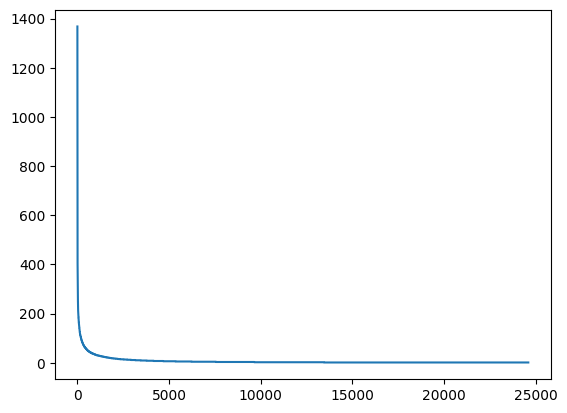

In [33]:
import matplotlib.pyplot as plt

xs=[]
ys=[]
curl_x = 1
for w in wc_sorted:
  xs.append(curl_x)
  ys.append(wc_sorted[w])
  curl_x+=1

plt.plot(xs, ys)
plt.show()

Biểu đồ vẽ ra như mọi người thấy ở trên được gọi là **"hockey sttick" curve**, tạm dịch là đường cong khúc côn cầu nha.

Hmmm, qua biểu đồ ta có thấy dược là **rất ít từ được sử dụng nhiều lần**, phần giá trị cao rất nhỏ, trong khi đó đại đa số các từ khác đều được sử dụng rất ít. Tuy nhiên mọi từ đều được đánh giá hiệu quả như nhau bởi đều có mặt trong phần embedding. Với việc cung cấp một tập huấn luyện lớn như vậy so với tập kiểm tra dùng để hiệu chỉnh (val) thì sẽ có nhiều từ trong tập huấn luyện không xuất hiện trong tập hiệu chỉnh.

Tụi mình sẽ tiến hành quân sát rõ hơn với các từ có chỉ mục trong khoảng **từ 300 đến 10000** trên trục Ox nha. Với trục Oy có thang đo từ 0 đến 100.

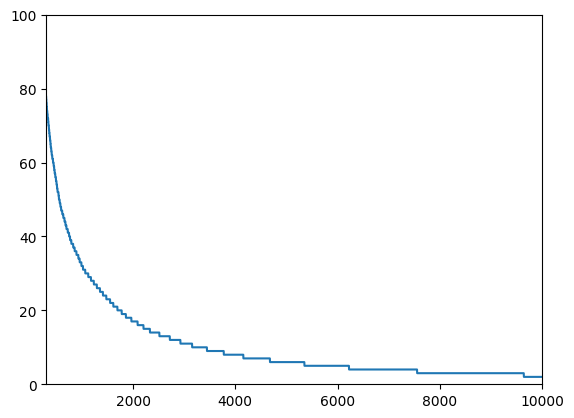

In [34]:
plt.plot(xs, ys)
plt.axis([300, 10000, 0, 100])
plt.show()

Tại sao lại quan sát **dưới khoảng 10.000**, đơn giản là vì ở mô hình trước đó, tuy là tổng cộng bộ dữ liệu có hơn **20.000** từ tuy nhiên ta chỉ cài đặt tham số **vocab_size là 10.000** nên ta sẽ tiến hành quan sát dữ liệu trong khoảng này.

Mọi người có thể thấy rõ các từ có chỉ mục **từ 2.000 đến 10.000** đại diện cho **80% dữ liệu huấn luyện** của ta nhưng số lần sử dụng của mỗi từ chỉ **dưới 20 lần**. Trong khi các từ ở trước tức trong khoảng **dưới 2.000** lại có số lần sử dụng quá cao.

Điều này có thể dẫn đến tình trạng quá khớp. Do đó chúng ta sẽ thử **giảm kích thước, số lượng từ sử dụng** xuống chỉ còn **2.000** để có số lượng, tần suất phân bổ hợp lý hơn, không bị chênh lệch quá nhiều.

In [35]:
# Khởi tạo lại tokenizer với kích thước 2000
tokenizer2k = Tokenizer(num_words=2000, oov_token="<OOV>")
tokenizer2k.fit_on_texts(train_sequences)
word_index_2k = tokenizer2k.word_index
print("Xem tập từ điển: ", word_index_2k)

Xem tập từ điển:  {'<OOV>': 1, 'new': 2, 'trump': 3, 'man': 4, 'report': 5, 'one': 6, 'year': 7, 'u': 8, 'area': 9, 'day': 10, 'says': 11, 'woman': 12, 'time': 13, 'like': 14, 'first': 15, 'donald': 16, 'get': 17, 'old': 18, 'trumps': 19, 'people': 20, 'life': 21, 'house': 22, 'obama': 23, 'white': 24, 'still': 25, 'back': 26, 'make': 27, 'women': 28, 'clinton': 29, 'could': 30, 'world': 31, '5': 32, 'way': 33, 'years': 34, 'family': 35, 'would': 36, 'black': 37, 'americans': 38, 'gop': 39, 'study': 40, 'american': 41, 'school': 42, '3': 43, 'bill': 44, 'cant': 45, 'show': 46, 'really': 47, 'finds': 48, 'best': 49, 'police': 50, 'nation': 51, 'watch': 52, '10': 53, 'know': 54, 'big': 55, 'going': 56, 'death': 57, 'good': 58, 'state': 59, 'president': 60, 'video': 61, 'home': 62, 'last': 63, 'things': 64, '2': 65, 'every': 66, 'say': 67, 'right': 68, 'kids': 69, 'campaign': 70, 'love': 71, 'parents': 72, 'mom': 73, 'hillary': 74, 'health': 75, 'work': 76, 'self': 77, '000': 78, 'getting

In [36]:
# Mã hóa cho tập train và tập test
train_sequences_encoded_2k = tokenizer2k.texts_to_sequences(train_sequences)
test_sequences_encoded_2k = tokenizer2k.texts_to_sequences(test_sequences)

In [37]:
# Kiểm tra đảm bảo việc mã hóa đã được thực hiện
print("Câu đã qua xử lý: ", train_sequences[0])
print("Câu đã được mã hóa: ", train_sequences_encoded_2k[0])

Câu đã qua xử lý:  trump really feels queer people explained one sentence
Câu đã được mã hóa:  [3, 47, 524, 594, 20, 1, 6, 1861]


Vì ở đây mình không thấy tác giả nói rõ là bao nhiêu, nếu như giống ở chương 5 là 10 thì mình thấy ngắn quá nên là chúng ta sẽ tiến hành đệm cho chuỗi dựa trên độ dài tối đa mà 95% độ dài dữ liệu train đều nằm trong khoảng đó nha.

In [38]:
# kiểm tra độ dài của câu dài nhất
list_len = [len(s) for s in train_sequences]
max_len = max(list_len)
mean_len = np.mean(list_len)
# Tính độ dài tối đa sao cho 95% các chuỗi có độ dài nhỏ hơn hoặc bằng giá trị này
max_len_95 = int(np.percentile(list_len, 95))
print("Độ dài tối đa with 95%: ", max_len_95)
print("Độ dài câu dài nhất: ", max_len)
print("Độ dài câu trung bình: ", mean_len)

Độ dài tối đa with 95%:  80
Độ dài câu dài nhất:  235
Độ dài câu trung bình:  50.65603843633981


In [39]:
padding_type = "post"
trunc_type = "post"
# Tiến hành đệm cho bộ dữ liệu
train_padded_2k = pad_sequences(train_sequences_encoded_2k,
                             maxlen = max_len_95,
                             padding = padding_type,
                             truncating = trunc_type)

test_padded_2k = pad_sequences(test_sequences_encoded_2k,
                            maxlen = max_len_95,
                            padding = padding_type,
                            truncating = trunc_type)

In [40]:
# Chuyển tất cả sang dạng numpy array
train_padded_2k = np.array(train_padded_2k)
# train_labels = np.array(train_labels)
test_padded_2k = np.array(test_padded_2k)
# test_labels = np.array(test_labels)

In [41]:
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model_2 = Sequential([
    Embedding(2000, 16, input_shape=(None,)),
  	GlobalAveragePooling1D(),
  	Dense(24, activation="relu"),
  	Dense(1, activation="sigmoid")
])


model_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [42]:
import time
# Tính thời gian huấn luyện
start_time = time.time()
history2 = model_2.fit(train_padded_2k, train_labels, epochs=100, validation_data=(test_padded_2k, test_labels))
end_time = time.time()
# Lấy danh sách thông số từ lịch sử huấn luyện ra
train_acc = history2.history["accuracy"]
val_acc = history2.history["val_accuracy"]
loss_acc = history2.history["loss"]
val_loss = history2.history["val_loss"]

Epoch 1/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5286 - loss: 0.6901 - val_accuracy: 0.6214 - val_loss: 0.6676
Epoch 2/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6236 - loss: 0.6471 - val_accuracy: 0.6560 - val_loss: 0.5992
Epoch 3/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7071 - loss: 0.5677 - val_accuracy: 0.6923 - val_loss: 0.5610
Epoch 4/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7536 - loss: 0.4981 - val_accuracy: 0.7612 - val_loss: 0.4795
Epoch 5/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7775 - loss: 0.4598 - val_accuracy: 0.7659 - val_loss: 0.4657
Epoch 6/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7843 - loss: 0.4457 - val_accuracy: 0.7676 - val_loss: 0.4634
Epoch 7/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7915 - loss: 0.4376 - val_accuracy: 0.7710 - val_loss: 0.4561
Epoch 8/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7946 - loss: 0.4297 - val_accu

In [43]:
from datetime import timedelta
training_time = end_time - start_time
formatted_time = str(timedelta(seconds=training_time))
print(f"Thời gian huấn luyện: {formatted_time}")

Thời gian huấn luyện: 0:03:23.807946


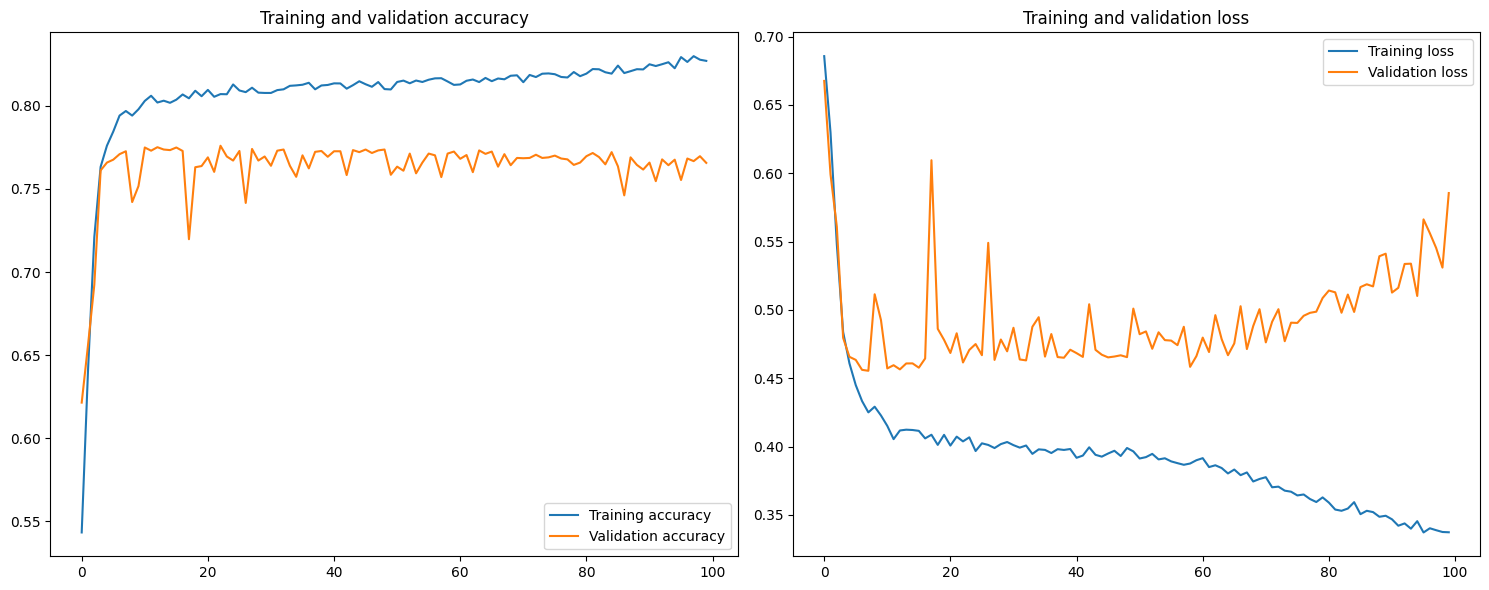

In [44]:
# Vẽ lại biểu đồ quá trình huấn luyện
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs = axs.flatten()
axs[0].plot(train_acc, label="Training accuracy")
axs[0].plot(val_acc, label="Validation accuracy")
axs[0].legend()
axs[0].set_title("Training and validation accuracy")

axs[1].plot(loss_acc, label="Training loss")
axs[1].plot(val_loss, label="Validation loss")
axs[1].legend()
axs[1].set_title("Training and validation loss")

plt.tight_layout()
plt.show()

Đây là kết quả ở lần chạy của mình:

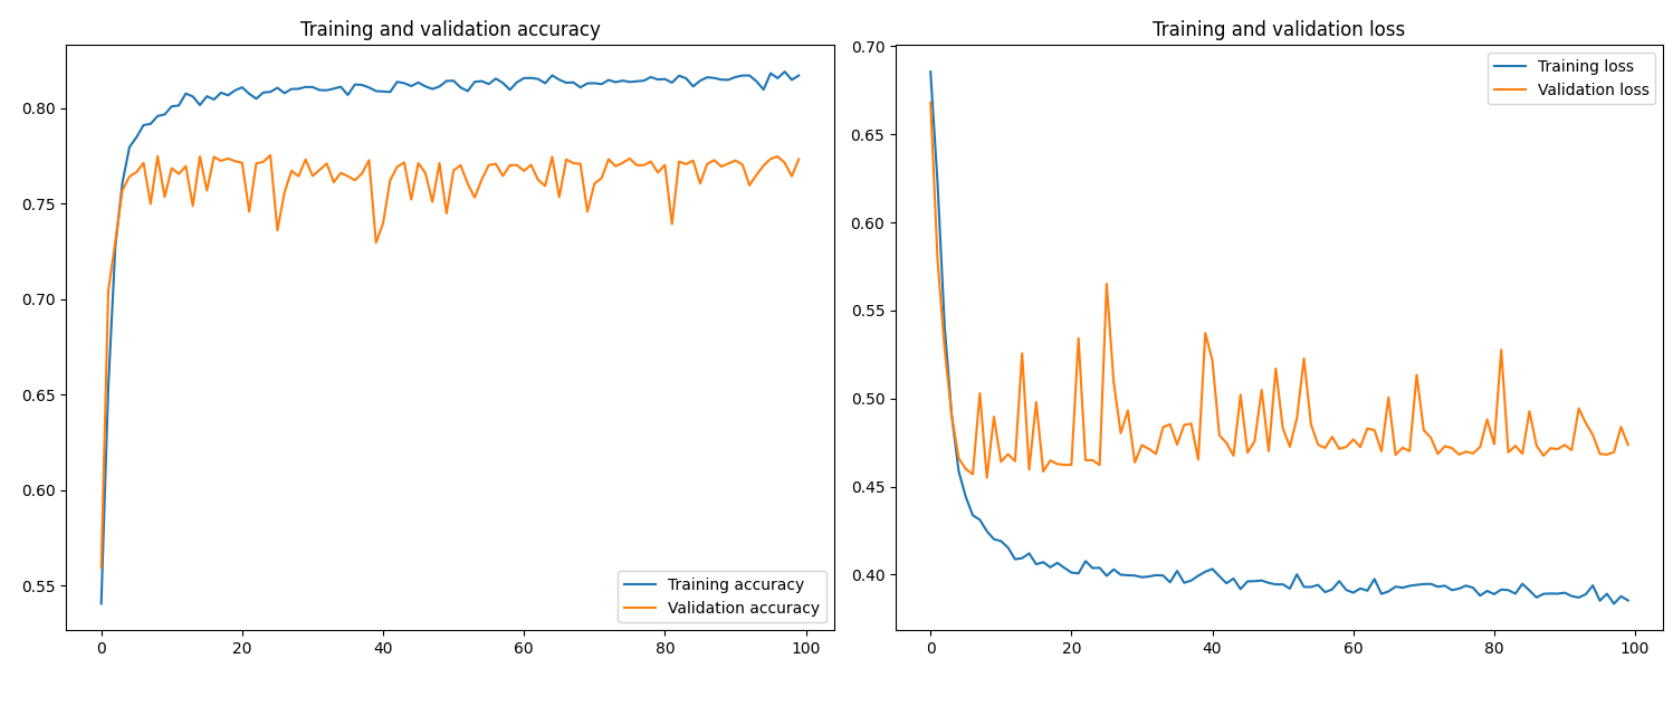

In [45]:
# Kết quả đánh giá mô hình
eval2 = model_2.evaluate(test_padded_2k, test_labels)
print("Loss:", eval2[0])
print("Accuracy:", eval2[1])

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7753 - loss: 0.5464
Loss: 0.5855421423912048
Accuracy: 0.7657232880592346


Ồ mọi người thấy đấy, **tỷ lệ loss đã giảm đi rất nhiều rồi**, cái cuối cùng cũng chỉ **0.475**, mặc dù tổng thể loss vẫn có tăng nhẹ tuy nhiên tốc độ đã giảm đi rất nhiều **không bị tăng lên đột ngột**.

Ngoài ra mọi người cũng thấy các đường train và loss đều **lên xuống thất thường** mặc dù tổng thể thì **vẫn hiệu quả** đúng không, điều này thường xuất phát từ việc **tốc độ học (learning rate) cao** dẫn đến mô hình khó nhận biết và hội tụ, do đó các đường sẽ bị lên xuống thất thường như vậy. Như ví dụ trước đó về việc **điều chỉnh tốc độ học thấp hơn**, đường biểu diễn độ chính xác và lỗi **mượt mà** hơn nhiều.

# Tổng kết phương pháp điều chỉnh kích thước từ vựng (vocab size)

Mọi người có thể thử nghiệm thêm nhiều **kích thước từ vựng** khác nha. Ở đây mình dựa trên biểu đồ rồi chọn ở con số **2.000** tương ứng với các từ có tần suất xuất hiện từ **20 lần trở lên**. Mọi người có thể thử những **con số nhỏ hơn** cũng được.

# Exploring embedding dimensions (Khám phá các chiều không gian của vector biểu diễn)

Ở ví dụ tiếp theo này, tụi mình sẽ cùng tìm hiểu về việc **mở rộng chiều không gian của embedding** nha. Như ở mô hình hiện tại chúng ta đang triển khai là **16** và nó thật sự là một con số **ngẫu nhiên** nha =)).
> **Liệu con số 16 chiều có phải là một con số tốt không?**

Giả định chúng ta vẫn sử dụng **vocab size là 2.000** thì có vẻ việc để đến tận **16 chiều** có vẻ là một con số **khá lớn** và nó có thể dẫn việc gia tăng **độ thưa thớt** của dữ liệu trong **không gian đa chiều**.

Ở đây theo như cách mình đọc được trong sách thì con số tốt nhất cho số chiều hay kích thước embedding là **bằng căn bậc 4 của kích thước từ vựng (vocab size)**

$$\huge \sqrt[4]{x}$$


Với khoảng **2.0000** từ vựng ta sẽ có **kích thước embedding** xấp xĩ là **7**.

Do đó ta sẽ tiến hành huấn luyện lại mô hình với sự thay đổi như trên. Về kết quả độ chính xác hay tỷ lệ lỗi chúng ta có thể chưa biết trước nhưng có một điều có thể xảy ra là **thời gian huấn luyện sẽ nhanh hơn rất nhiều** bởi kích thước dữ liệu cũng như số phép tính toán đã được giảm đi đáng kể.

In [46]:
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model_3 = Sequential([
    Embedding(2000, 7, input_shape=(None,)),
  	GlobalAveragePooling1D(),
  	Dense(24, activation="relu"),
  	Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [47]:
import time
# Tính thời gian huấn luyện
start_time = time.time()
history3 = model_3.fit(train_padded_2k, train_labels, epochs=100, validation_data=(test_padded_2k, test_labels))
end_time = time.time()

# Lấy danh sách thông số từ lịch sử huấn luyện ra
train_acc = history3.history["accuracy"]
val_acc = history3.history["val_accuracy"]
loss_acc = history3.history["loss"]
val_loss = history3.history["val_loss"]

Epoch 1/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5370 - loss: 0.6901 - val_accuracy: 0.5662 - val_loss: 0.6756
Epoch 2/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6183 - loss: 0.6592 - val_accuracy: 0.6780 - val_loss: 0.5995
Epoch 3/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6928 - loss: 0.5803 - val_accuracy: 0.6305 - val_loss: 0.6216
Epoch 4/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7443 - loss: 0.5124 - val_accuracy: 0.7605 - val_loss: 0.4854
Epoch 5/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7830 - loss: 0.4606 - val_accuracy: 0.7584 - val_loss: 0.4853
Epoch 6/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7794 - loss: 0.4541 - val_accuracy: 0.7615 - val_loss: 0.4752
Epoch 7/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7928 - loss: 0.4357 - val_accuracy: 0.7559 - val_loss: 0.4860
Epoch 8/100
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7983 - loss: 0.4247 - val_accu

In [48]:
from datetime import timedelta
training_time = end_time - start_time
formatted_time = str(timedelta(seconds=training_time))
print(f"Thời gian huấn luyện: {formatted_time}")

Thời gian huấn luyện: 0:03:25.105006


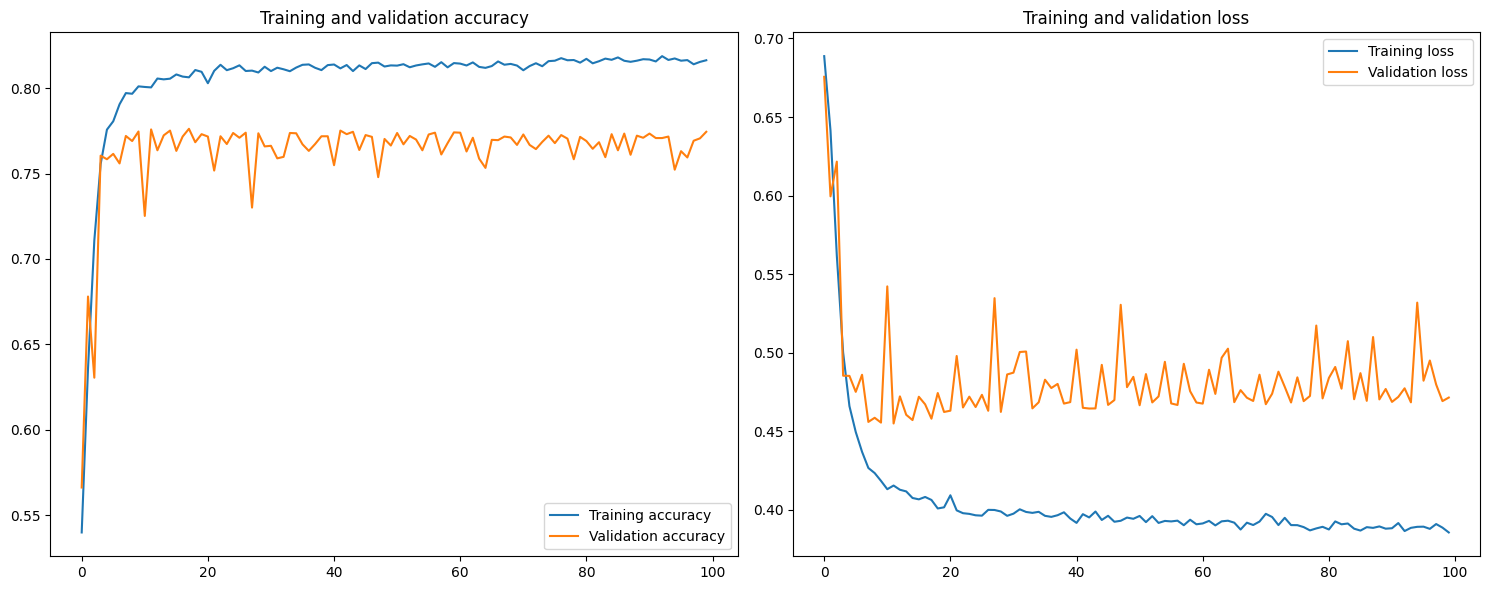

In [49]:
# Vẽ lại biểu đồ quá trình huấn luyện
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs = axs.flatten()
axs[0].plot(train_acc, label="Training accuracy")
axs[0].plot(val_acc, label="Validation accuracy")
axs[0].legend()
axs[0].set_title("Training and validation accuracy")

axs[1].plot(loss_acc, label="Training loss")
axs[1].plot(val_loss, label="Validation loss")
axs[1].legend()
axs[1].set_title("Training and validation loss")

plt.tight_layout()
plt.show()

Đây là kết quả ở lần chạy của mình nha.

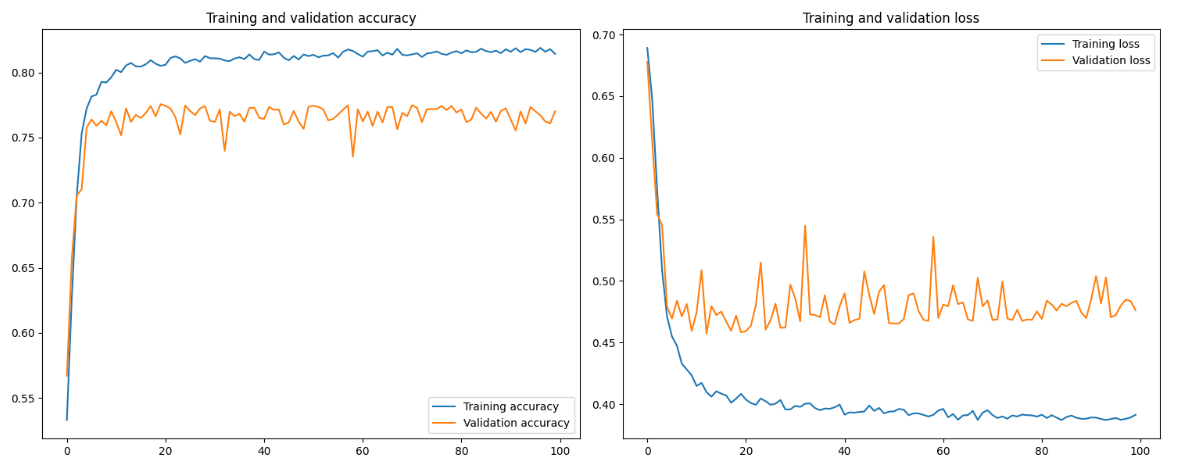

In [50]:
# Kết quả đánh giá mô hình
eval3 = model_3.evaluate(test_padded_2k, test_labels)
print("Loss: ", eval3[0])
print("Accuracy: ", eval3[1])

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7815 - loss: 0.4515
Loss:  0.47152337431907654
Accuracy:  0.7744584083557129


Theo như tác giả nói thì tuy là độ hiệu quả của mô hình không thay đổi nhiều lắm, tuy nhiên thời gian huấn luyện có thể **nhanh hơn 30%**.

---

*P/s: khúc này mình cũng hơi lú, về lý thuyết thì là vậy nhưng có vẻ như ở trường hợp hay lần chạy của mình đã xảy ra ngoại lệ khi mà thời gian có vẻ tăng hơn trước. Theo mình tìm hiểu thì rất có thể khi giảm số chiều đi khiến mô hình bị **mất mát thông tin quan trọng** buộc chúng phải chạy **lâu hơn để tìm ra các điểm đặc biệt**.*

